In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

**EGZERSİZ 1. Belirli bir sektördeki saatlik ücretler normalde ortalama 13,20 dolar ve standart sapma 2,50 dolar ile dağıtılır. Bu sektördeki bir şirket, 40 işçi çalıştırıyor ve onlara saatte ortalama 12.20 dolar ödüyor. Bu şirket standartların altında ücretler ödemekle suçlanabilir mi? α = .01 seviye testi kullanın. (Wackerly, Ör. 10.18)
KONTROL: istatistik: -2.5298221281347035, pvalue= 0.005706018193000826 

In [ ]:
#H0: Mu1  = 12.20 
#H1: Mu1 < 12.20

In [4]:
xbar  = 12.2
sigma = 2.5
n = 40
mu = 13.2

In [5]:
z = (xbar-mu) / (sigma / np.sqrt(n)) 
z
# istatistik: -2.5298221281347035

-2.5298221281347035

In [6]:
p = stats.norm.cdf(z)   
p
# pvalue= 0.005706018193000826

0.005706018193000826

In [ ]:
# Normal dağılım varsayımı altında;
# p<0.01. H0'ı reddet. Şirket, standart altı ücretler ödemekle suçlanabilir.

**EGZERSİZ 2. İki tip toprak için sınırsız sıkıştırma testlerinden elde edilen kayma mukavemeti ölçümleri, aşağıdaki belgede gösterilen sonuçları vermiştir (metrekare başına ton cinsinden ölçümler). Topraklar ortalama kesme mukavemetine göre %1 anlamlılık seviyesinde farklılık gösteriyor mu?

İki tür toprak için sonuçlar

KONTROL: istatistik: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [13]:
df = pd.read_csv("soil - Sheet1.csv")
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
...,...,...
30,NaN,1.593
31,NaN,1.172
32,NaN,1.510
33,NaN,1.740


In [ ]:
# Hipotez
# H0: Ortaya çıkan topraklar ortalamaya göre farklılık göstermez
# H1: Topraklar ortalamaya göre farklılık gösteriyor.
# Varsayımlar
# Normallik
# H0: Ortalamanın örnekleme dağılımı normaldir
# H1: Ortalamanın örnekleme dağılımı normal değil

In [ ]:
toprak, pvalue = stats.shapiro(df["Soil1"].dropna())
print('toprak = %.4f, p-value = %.4f' % (toprak, pvalue))

In [ ]:
# H0 reddedilemedi. Ortalamanın örnekleme dağılımı normaldir

In [51]:
toprak, pvalue = stats.shapiro(df["Soil2"])
print('toprak = %.4f, p-value = %.4f' % (toprak, pvalue))

toprak = 0.9684, p-value = 0.4012


In [ ]:
# H0 reddedilemedi. Ortalamanın örnekleme dağılımı normaldir

In [ ]:
# Varyans
# H0: Örnekleme varyansı normaldir
# H1: Örnekleme varyansı normal değil

In [52]:
toprak, pvalue = stats.levene(df["Soil1"].dropna(), df["Soil2"])
print('toprak = %.4f, p-value = %.4f' % (toprak, pvalue))

toprak = 0.3149, p-value = 0.5767


In [ ]:
# H0 reddedilemedi. Örnekleme varyansı normaldir

In [15]:
toprak, pvalue = stats.ttest_ind(df["Soil1"].dropna(),df["Soil2"])

In [16]:
# (5.1681473319343345, 2.593228732352821e-06)
#p<0.01. H0'ı reddet. Toprakların ortalamaya göre farklılık gösterdiği görülmektedir.

**EGZERSİZ 3. Aşağıdaki veri kümesi, Dünya Bankası (https://datacatalog.worldbank.org/dataset/education-statistics) tarafından sağlanan verilere dayanmaktadır. Dünya Bankası Edstats. 2015 PISA Test Veri Kümesi
Her kıta grubu (AS, AB, AF, NA, SA, OC) için açıklayıcı istatistikler (veri kümesinin dağılımının merkezi eğilimi, dağılımı ve şekli) alın.
Avrupa (AB) ve Asya (AS) ülkeleri arasında matematik puanları için herhangi bir fark (ortalamada) olup olmadığını belirleyin (normallik ve eşit varyanslar olduğunu varsayalım). Yan yana kutu grafikleri çizin.
KONTROL: istatistik = 0.870055317967983, pvalue = 0.38826888111307345

In [17]:
df_ = pd.read_csv("2015 PISA Test - Sheet.csv")
df_.head()
df_.shape
df_.groupby(["Continent_Code"]).describe()

internet_users_per_100                                                    Math                                                        Reading          \
                                count   mean    std    min    25%    50%    75%    max  count    mean    std     min     25%     50%     75%     max   count    mean   
Continent_Code                                                                                                                                                         
AF                              2.000 43.360  7.297 38.200 40.780 43.360 45.940 48.520  2.000 363.212  5.100 359.606 361.409 363.212 365.015 366.818   2.000 355.457   
AS                             17.000 68.456 21.086 21.976 50.300 74.000 84.948 92.885 17.000 466.217 64.356 380.259 403.833 459.816 531.296 564.190  17.000 454.060   
EU                             37.000 77.275 12.426 53.745 68.633 76.184 87.479 98.200 37.000 477.981 35.150 371.311 464.040 489.729 503.722 521.251  37.000 476.165   
OC                              2.000 86.392  2.590 84.561 85.476 86.392 87.307 88.223  2.000 494.560  0.938 493.896 494.228 494.560 494.892 495.223   2.000 506.086   
SA                              7.000 60.180  9.772 40.900 57.116 64.289 66.322 69.198  7.000 402.888 18.129 377.070 388.102 409.033 417.618 422.671   7.000 425.359   

                                                              Science                                                         
                  std     min     25%     50%     75%     max   count    mean    std     min     25%     50%     75%     max  
Continent_Code                                                                                                                
AF              7.917 349.859 352.658 355.457 358.256 361.055   2.000 381.074  7.537 375.745 378.410 381.074 383.739 386.403  
AS             57.049 346.549 408.102 433.542 508.690 535.100  17.000 467.946 56.671 386.485 417.611 456.484 523.277 555.575  
EU             37.721 351.741 452.514 487.250 499.815 526.425  37.000 478.299 34.451 383.682 460.775 490.225 501.937 534.194  
OC              4.504 502.901 504.493 506.086 507.678 509.271   2.000 511.649  2.340 509.994 510.821 511.649 512.476 513.303  
SA             19.710 397.541 416.127 425.303 431.923 458.571   7.000 421.747 18.470 396.684 408.205 424.591 433.795 446.956

In [ ]:
# Normallik ve eşit varyans varsayımı altında
# H0: Avrupa (AB) ve Asya (AS) arasında matematik puanları için (ortalama olarak) herhangi bir fark yoktur.
# H1: Avrupa (AB) ve Asya (AS) arasında matematik puanları için (ortalama olarak) herhangi bir fark var

In [18]:
test_stat, pvalue = stats.ttest_ind(df_.loc[df_["Continent_Code"] == "EU", "Math"],
                              df_.loc[df_["Continent_Code"] == "AS", "Math"],
                              equal_var=True) 

In [ ]:
# (0.870055317967983, 0.38826888111307345)
#p>0.05. H0 reddedilemedi. Hiçbir fark yok...

<AxesSubplot:xlabel='Continent_Code', ylabel='Math'>

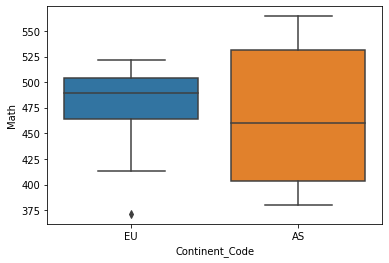

In [19]:
df_new = df_[(df_["Continent_Code"] == 'EU') | (df_["Continent_Code"] == 'AS')]
sns.boxplot(x=df_new["Continent_Code"], y=df_new['Math'])

**EGZERSİZ 4. Bir spor salonu işletmecisi, aşırı kilolarından muzdarip 15 müşteri için 2 aylık bir egzersiz ve diyet programı düzenledi. Bu diyet programının etkili olup olmadığını değerlendirmek için müşterilerin başlangıç ve bitiş ağırlıklarını ölçtü ve bilgisayara kaydetti. Egzersiz ve diyet programının müşterilerin kilo kaybı üzerinde bir etkisi oldu mu? α = .01 seviye testi kullanın. Ağırlık Veri Kümesi

KONTROL: istatistik = 2.67808348404993, pvalue = 0.00900646517506627

In [20]:
df = pd.read_csv("weight - Sheet.csv")
df.head()
df["dbar"] = df["starting"] - df["ending"]

In [11]:
# H0: dbar = 0
# H1: dbar > 0

In [21]:
stats.ttest_rel(df.starting, df.ending, alternative = "greater")

Ttest_relResult(statistic=nan, pvalue=nan)

In [ ]:
# Ttest_relResult(istatistik=2.6780834840499255, pdeğeri=0.00900646517506626)
# p < 0.01. H0'ı reddet. Demek ki diyet programı etkiliymiş